In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [15]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


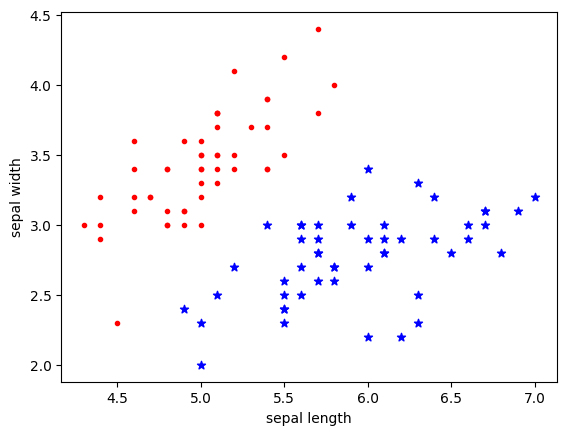

In [16]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')           
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color ='red',marker = '.') 
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color ='blue',marker = '*') 

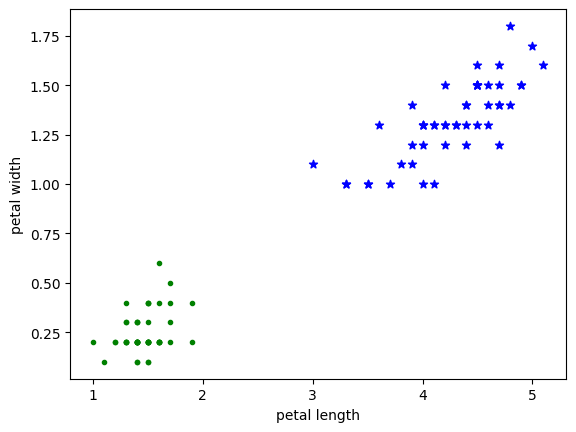

In [17]:
plt.xlabel('petal length')
plt.ylabel('petal width')           
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color ='green',marker = '.') 
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color ='blue',marker = '*') 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(['target', 'flower_name'],axis = 'columns')

In [20]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Support Vector Machine Model

In [23]:
from sklearn.svm import SVC
model = SVC(gamma=0.1)

In [24]:
model.fit(X_train, y_train)

SVC(gamma=0.1)

In [25]:
model.score(X_test, y_test)

0.9666666666666667

# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
modelr = RandomForestClassifier(n_estimators=5) 

In [92]:
modelr.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [94]:
modelr.score(X_test,y_test)

0.9333333333333333

# K-fold Cross Validation

In [96]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [99]:
from sklearn.model_selection import cross_val_score

## Logistic regression model performance using cross_val_score

In [103]:
from sklearn.linear_model import LogisticRegression

In [105]:
cross_val_score(LogisticRegression(),X,y,cv=3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.98, 0.96, 0.98])

## svm model performance using cross_val_score

In [107]:
cross_val_score(SVC(),X,y,cv=3)

array([0.96, 0.98, 0.94])

## Decision Tree model performance using cross_val_score

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=3)

array([0.98, 0.94, 1.  ])

## random forest performance using cross_val_score

In [129]:
cross_val_score(RandomForestClassifier(),X,y,cv=3)

array([0.98, 0.94, 0.96])

# Best score so far is from Decision Tree and Logistic Regression model .9733